[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/3.2%20FinanceDataReader%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%20%EC%88%98%EC%9D%B5%EB%A5%A0%20%EB%B9%84%EA%B5%90-input.ipynb)


* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [ ]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [2]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

In [3]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [4]:
# stock_dict 변수의 타입을 봅니다.
type(stock_dict)

dict

In [5]:
# dict 는 key:value 구조 입니다. key만 봅니다.
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [6]:
# dict 는 key:value 구조 입니다. value만 봅니다.
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [24]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2020")['Close']
    item_list.append(close)

In [8]:
len(item_list)

8

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [25]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,55200,94700,118000,173489,314000,236000,107500,182500
2020-01-03,55500,94500,116000,171079,311000,237000,107500,181500
2020-01-06,55500,94300,116000,166742,307000,231000,106000,180500
2020-01-07,55800,94000,115500,171561,311000,232000,108000,187000
2020-01-08,56800,97400,112000,166742,302000,228000,105000,183000
...,...,...,...,...,...,...,...,...
2022-06-16,60900,97400,173000,150000,584000,267500,111500,240000
2022-06-17,59800,96400,170000,153000,578000,262500,112500,237500
2022-06-20,58700,94500,170500,152500,572000,252500,109500,234000


### 시각화를 위한 폰트 설정

In [12]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [13]:
get_font_family()

'Malgun Gothic'

In [17]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\HANON\AppData\Local\Temp\ipykernel_1856\1524831313.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [16]:
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:title={'center':'한글폰트'}>

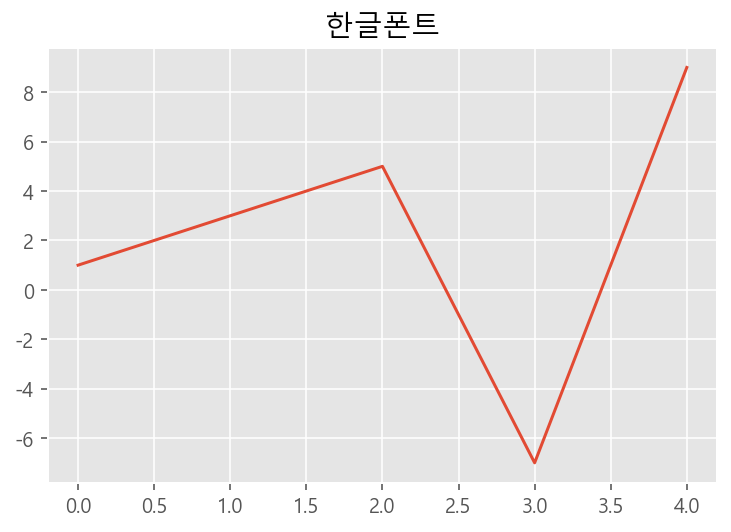

In [18]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 여러 종목 한번에 시각화 하기

<AxesSubplot:xlabel='Date'>

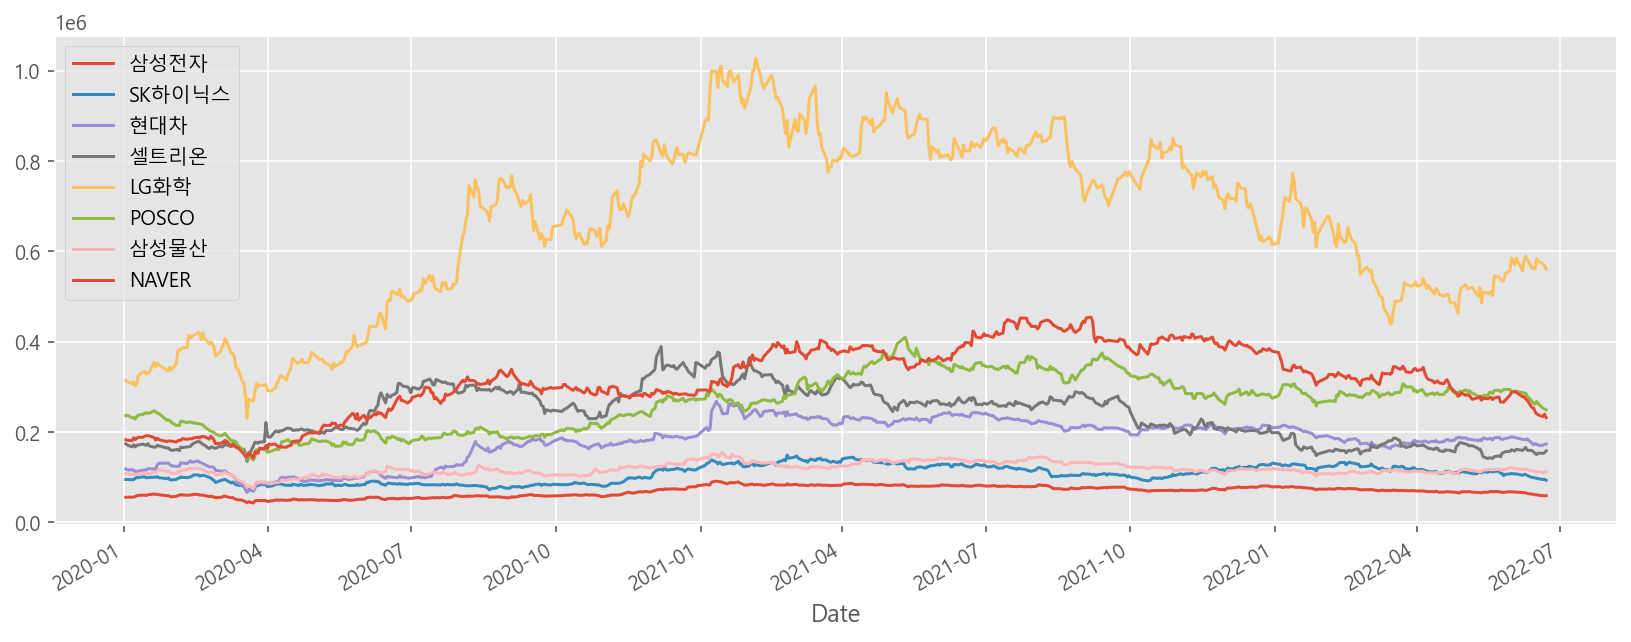

In [26]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize=(14, 5))

<AxesSubplot:xlabel='Date'>

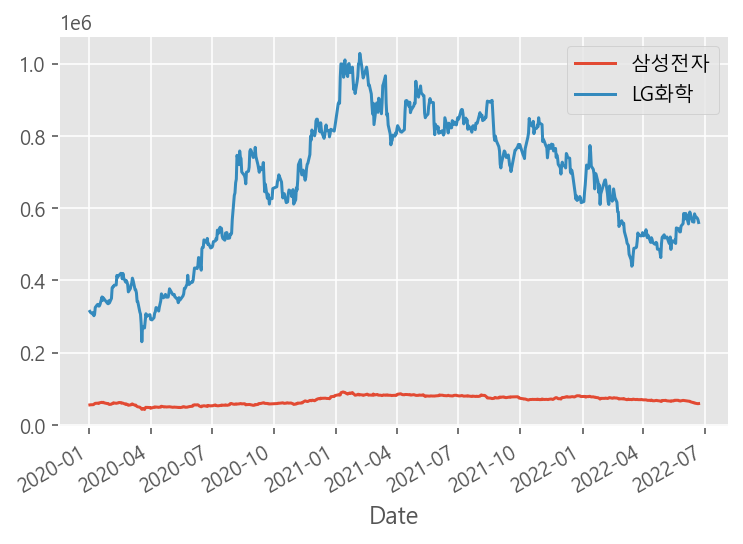

In [27]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[['삼성전자', 'LG화학']].plot()

## 2축 그래프 사용하기

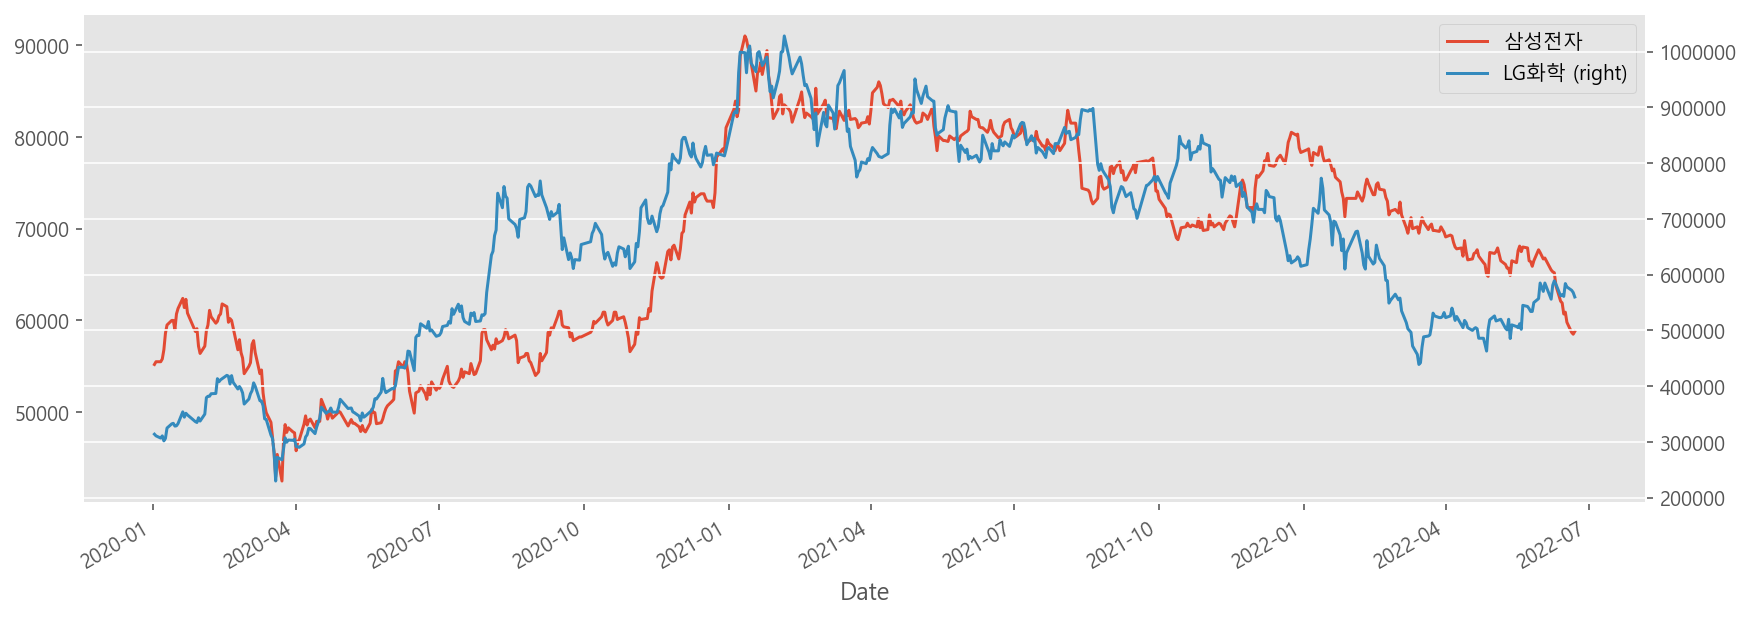

In [50]:
# secondary_y를 사용해 2축 그래프 그리기
df[['삼성전자', 'LG화학']].plot(secondary_y="LG화학", figsize=(14, 5))
# https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
plt.ticklabel_format(style='plain', axis='y')

In [36]:
df[['삼성전자', 'LG화학']].index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-06-09', '2022-06-10', '2022-06-13', '2022-06-14',
               '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-20',
               '2022-06-21', '2022-06-22'],
              dtype='datetime64[ns]', name='Date', length=611, freq=None)

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [51]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[["LG화학", "삼성전자"]]
df_plot = (df2/df2.iloc[0]) - 1
df_plot

,LG화학,삼성전자
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,-0.009554,0.005435
2020-01-06,-0.022293,0.005435
2020-01-07,-0.009554,0.010870
2020-01-08,-0.038217,0.028986
...,...,...
2022-06-16,0.859873,0.103261
2022-06-17,0.840764,0.083333
2022-06-20,0.821656,0.063406


In [53]:
df_plot.tail()

,LG화학,삼성전자
Date,,
2022-06-16,0.859873,0.103261
2022-06-17,0.840764,0.083333
2022-06-20,0.821656,0.063406
2022-06-21,0.808917,0.059783
2022-06-22,0.783439,0.065217


<AxesSubplot:xlabel='Date'>

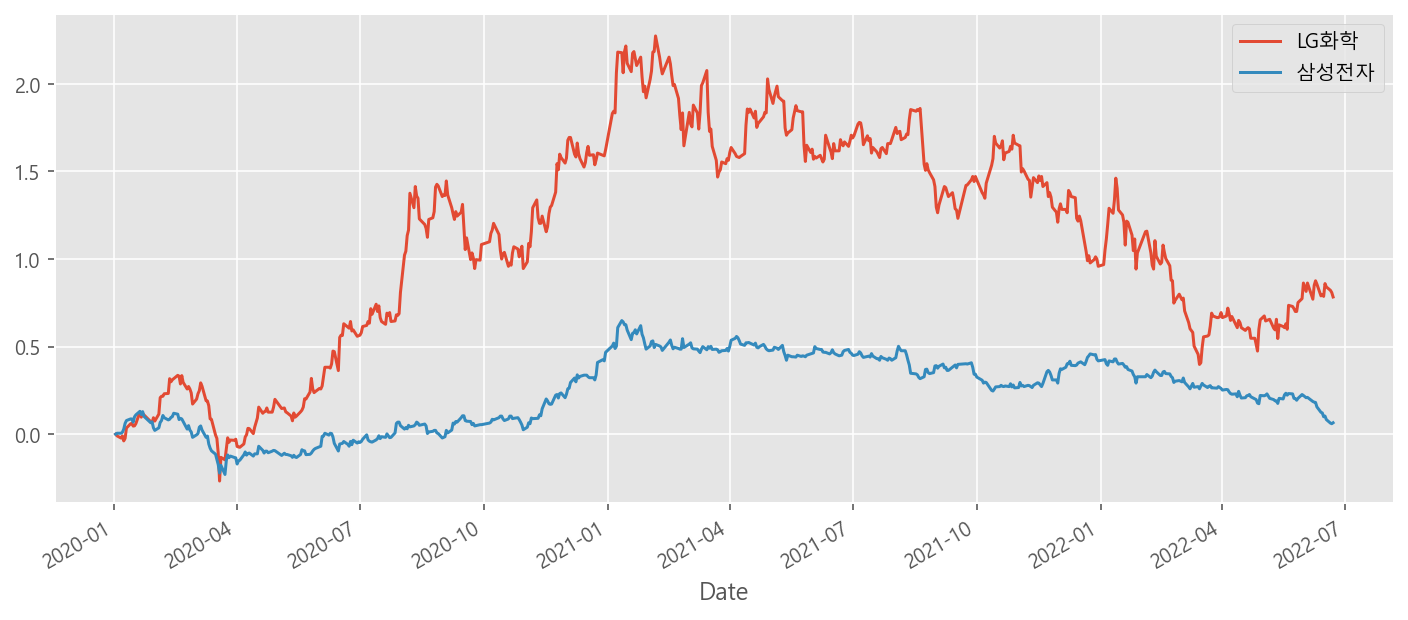

In [58]:
# 수익률 시각화 하기
df_plot.plot(figsize=(12, 5))

## pyplot의 subplots 로 서브플롯 그리기

<AxesSubplot:title={'center':'수익률 그래프'}, xlabel='Date'>

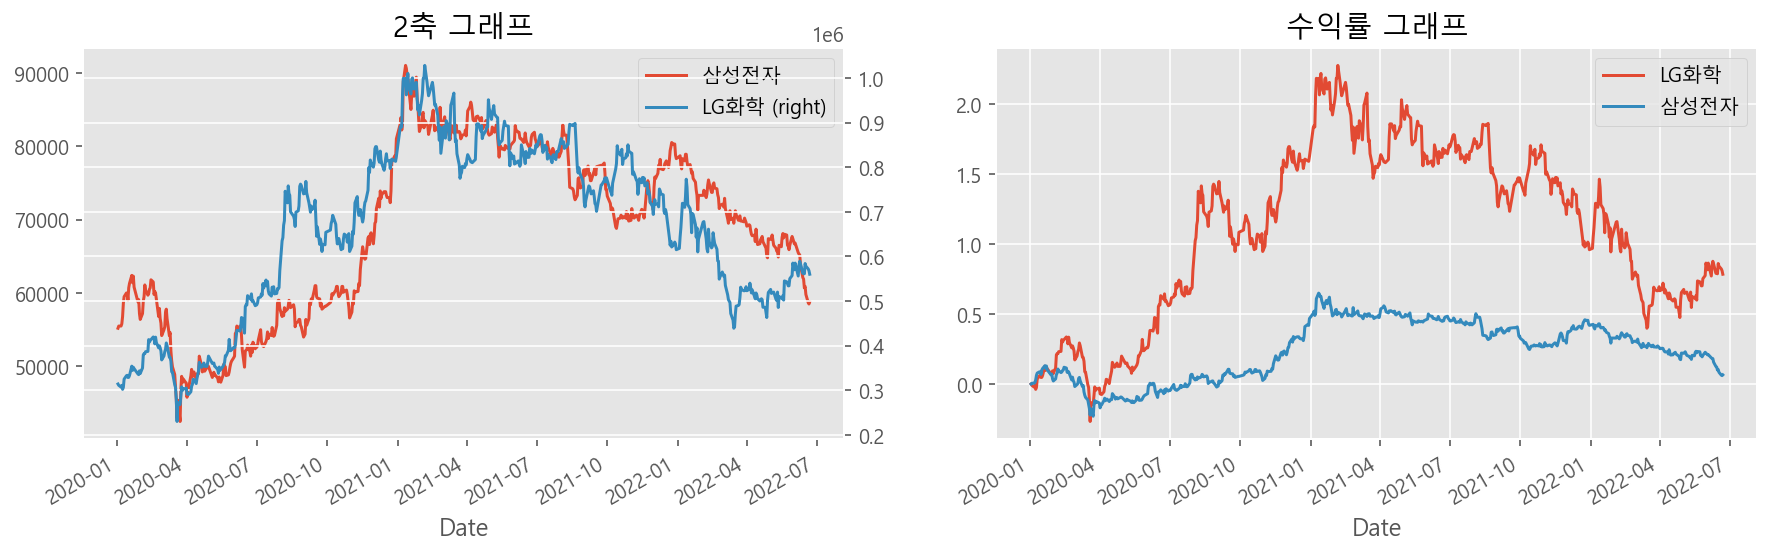

In [59]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

df[['삼성전자', 'LG화학']].plot(secondary_y="LG화학", ax=axes[0], title="2축 그래프")
df_plot.plot(ax=axes[1], title="수익률 그래프")

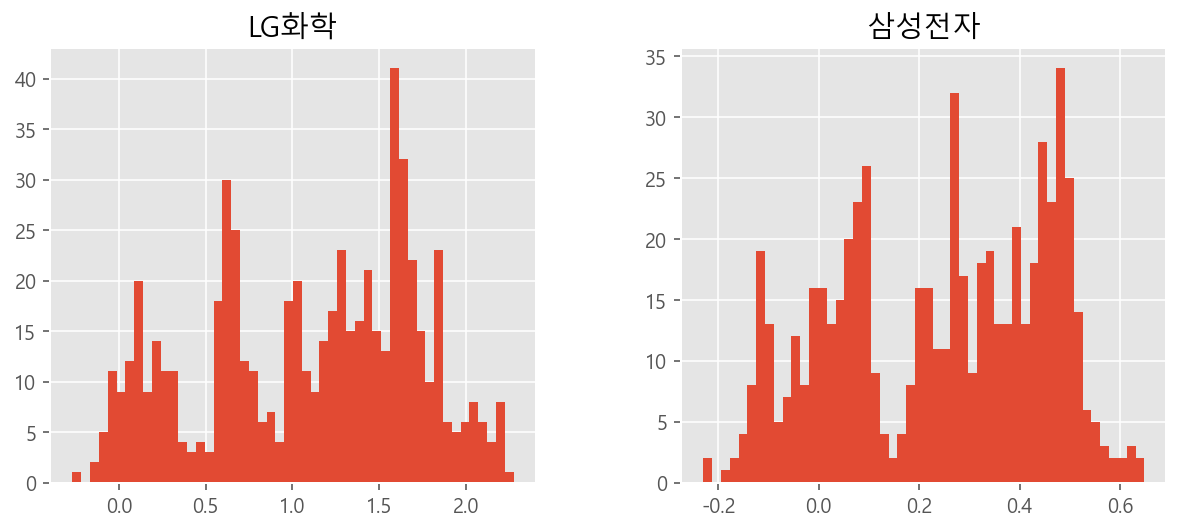

In [60]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
h = df_plot.hist(figsize=(10, 4), bins=50)

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [61]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = df / df.iloc[0] - 1
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.005435,-0.002112,-0.016949,-0.013891,-0.009554,0.004237,0.000000,-0.005479
2020-01-06,0.005435,-0.004224,-0.016949,-0.038890,-0.022293,-0.021186,-0.013953,-0.010959
2020-01-07,0.010870,-0.007392,-0.021186,-0.011113,-0.009554,-0.016949,0.004651,0.024658
2020-01-08,0.028986,0.028511,-0.050847,-0.038890,-0.038217,-0.033898,-0.023256,0.002740
...,...,...,...,...,...,...,...,...
2022-06-16,0.103261,0.028511,0.466102,-0.135392,0.859873,0.133475,0.037209,0.315068
2022-06-17,0.083333,0.017951,0.440678,-0.118100,0.840764,0.112288,0.046512,0.301370
2022-06-20,0.063406,-0.002112,0.444915,-0.120982,0.821656,0.069915,0.018605,0.282192


### 전체 종목의 수익률 시각화

<AxesSubplot:xlabel='Date'>

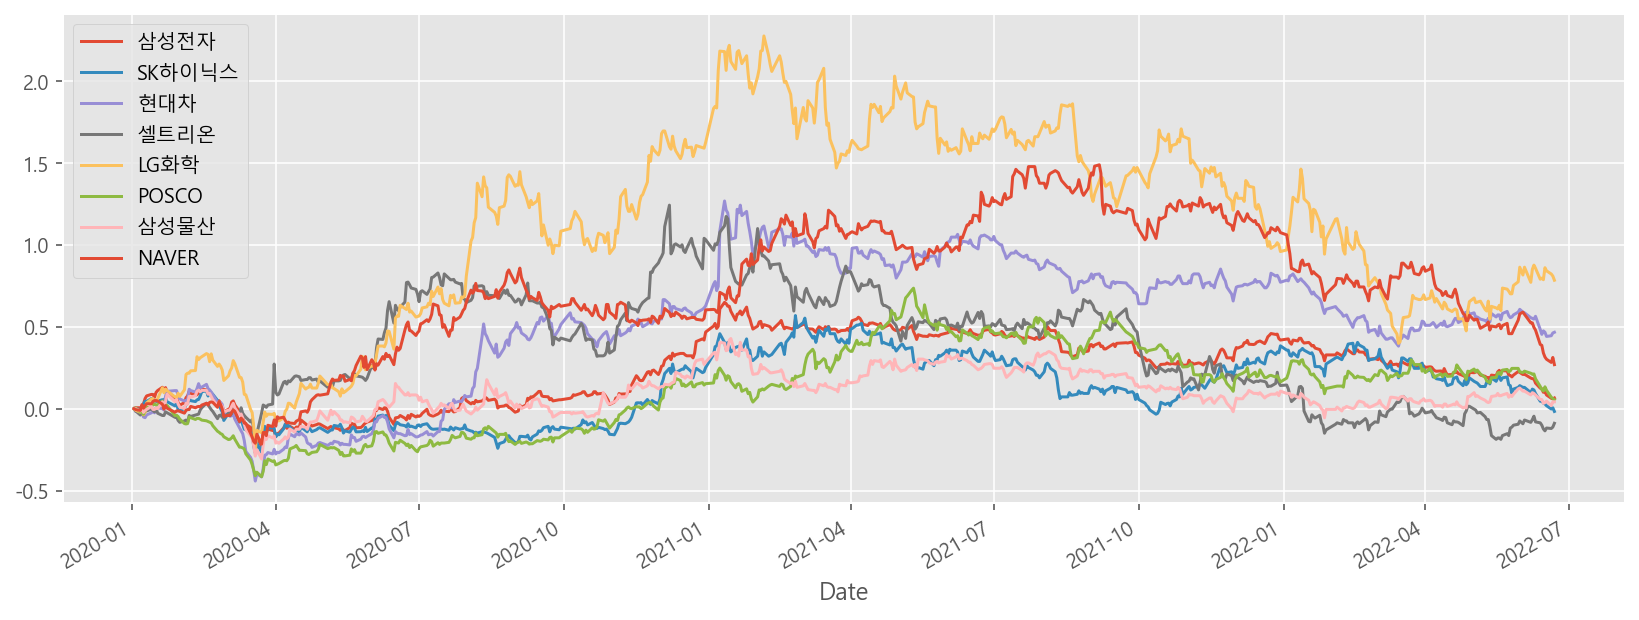

In [63]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(14, 5))

In [64]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,0.240373,0.131427,0.523758,0.372725,1.096344,0.124293,0.098606,0.730529
std,0.208619,0.201907,0.405357,0.342486,0.614871,0.258026,0.125717,0.426470
min,-0.230072,-0.271383,-0.441525,-0.222227,-0.267516,-0.415254,-0.306977,-0.216438
25%,0.062500,-0.087645,0.330508,0.012790,0.622611,-0.131356,0.018605,0.516438
50%,0.271739,0.135164,0.567797,0.434131,1.210191,0.173729,0.079070,0.723288
75%,0.430254,0.304118,0.822034,0.649995,1.605096,0.298729,0.195349,1.098630
max,0.648551,0.568110,1.266949,1.241658,2.273885,0.735169,0.427907,1.487671


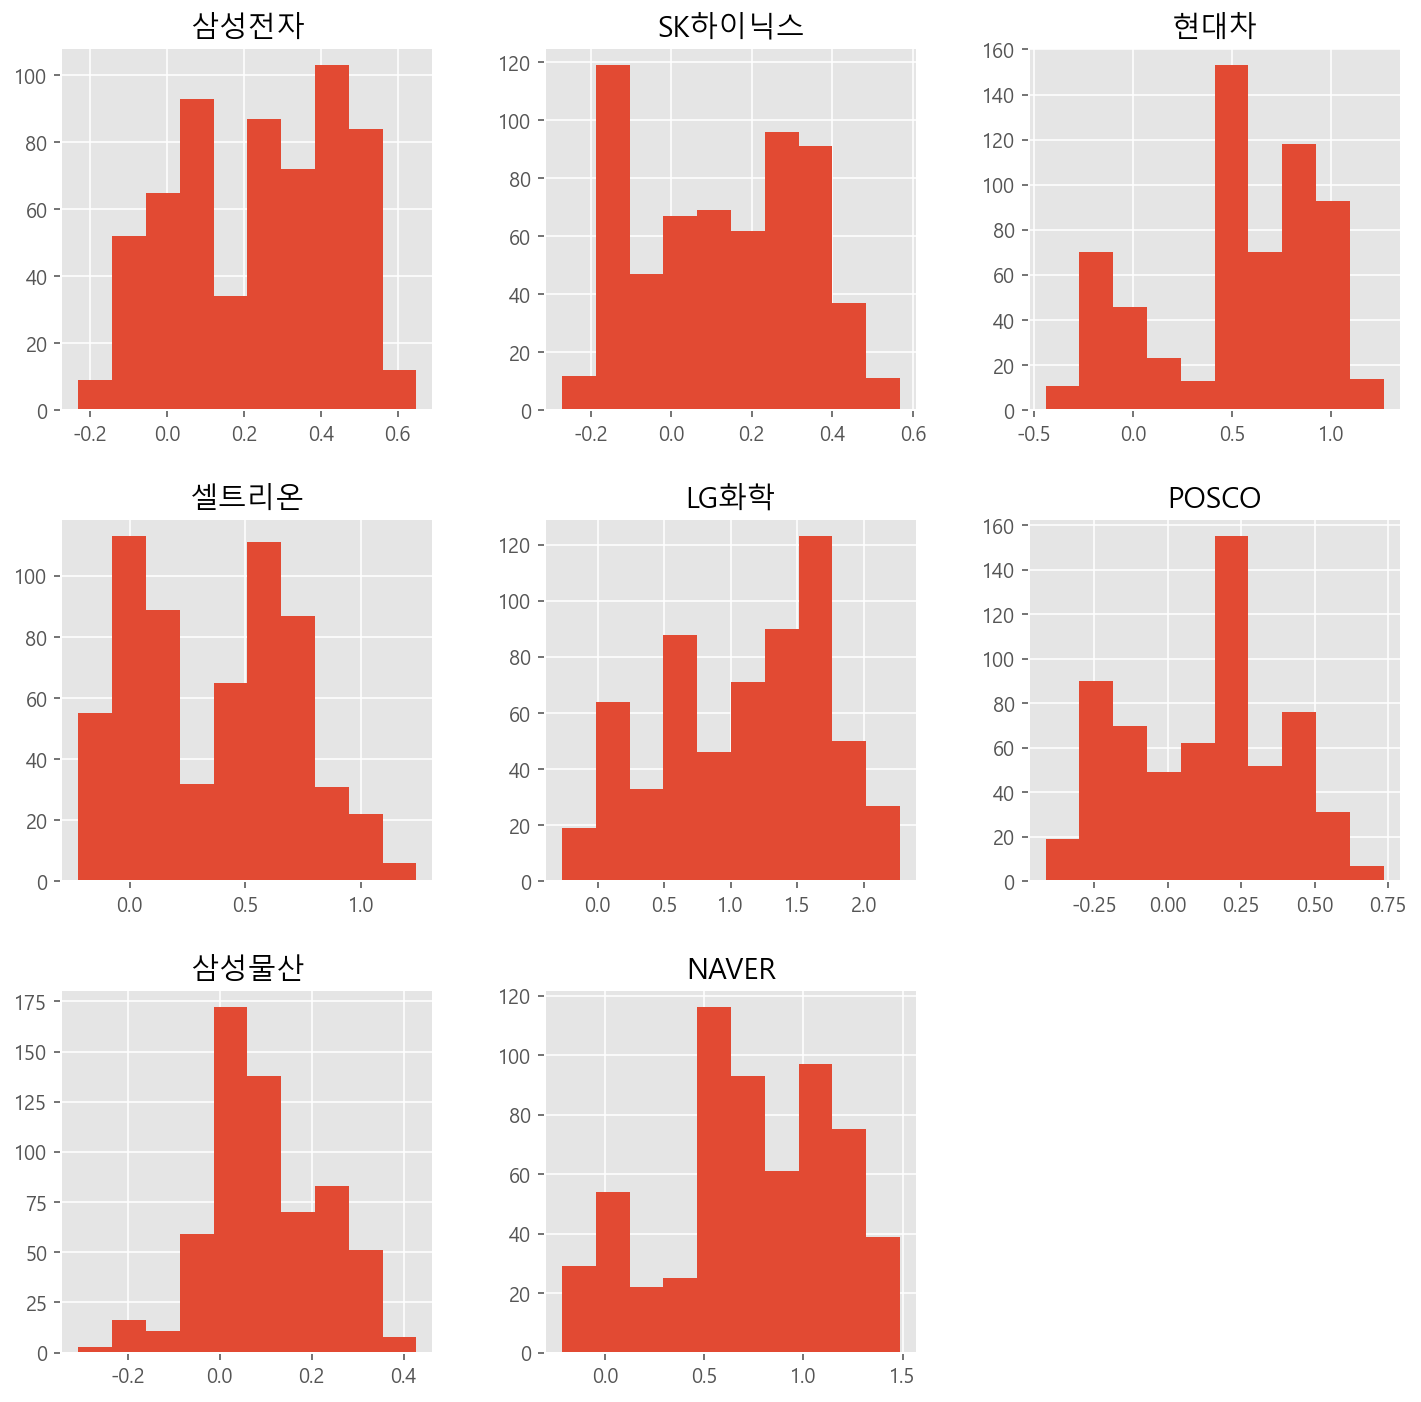

In [65]:
# 수익률에 대한 히스토그램 그리기
h = df_norm.hist(figsize=(12, 12))

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [66]:
# skew 로 수익률의 왜도를 구합니다.
df_norm.skew()

삼성전자     -0.231792
SK하이닉스   -0.027368
현대차      -0.581066
셀트리온      0.104765
LG화학     -0.284783
POSCO    -0.058420
삼성물산      0.076079
NAVER    -0.346909
dtype: float64

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)



* [scipy.stats.kurtosis — SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)
* Fisher의 정의를 사용하면 결과에서 3.0을 빼서 정규 분포에 대해 0.0이 됩니다.
* True 이면 피셔의 정의가 사용됩니다(정상 ==> 0.0). False이면 Pearson의 정의가 사용됩니다(정상 ==> 3.0)

In [67]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

삼성전자     -1.145254
SK하이닉스   -1.224212
현대차      -0.736326
셀트리온     -1.148696
LG화학     -1.011283
POSCO    -0.978172
삼성물산     -0.038618
NAVER    -0.727416
dtype: float64

In [68]:
df_norm.kurtosis()

삼성전자     -1.145254
SK하이닉스   -1.224212
현대차      -0.736326
셀트리온     -1.148696
LG화학     -1.011283
POSCO    -0.978172
삼성물산     -0.038618
NAVER    -0.727416
dtype: float64